## Imagens como funções, Filtragem

### Instalação do OpenCV (python) com Jupyter e Conda

Container docker para Conda (python), Jupyter e OpenCV:

```python
docker run --name comp_vision --mount type=bind,source="$(pwd)"/notebooks,target=/opt/notebooks -i -t -p 8888:8888 continuumio/anaconda3 /bin/bash -c "/opt/conda/bin/conda update -n base conda && /opt/conda/bin/conda install -y opencv && /opt/conda/bin/conda install jupyter -y --quiet && /opt/conda/bin/jupyter notebook --notebook-dir=/opt/notebooks --ip='*' --port=8888 --no-browser --allow-root"
```

Execuções futuras com o mesmo container:

```python
docker start -i comp_vision
```

### Core operations of OpenCV (Tutorial em Python):

http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_table_of_contents_core/py_table_of_contents_core.html

(512, 512, 3)


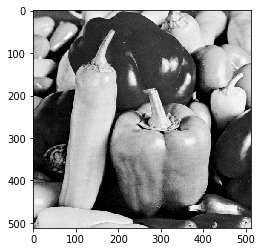

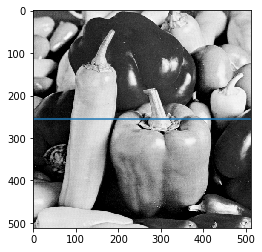

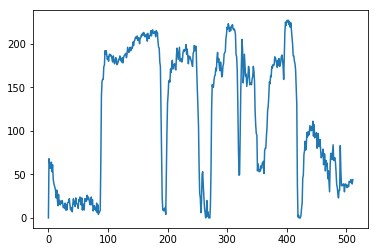

In [2]:
# 2A-L1 16

import cv2
from matplotlib import pyplot as plt

im = cv2.imread('course_images/peppers.png')
print(im.shape)

imgreen = im[:,:,1] # 0:B, 1:G, 2:R
plt.imshow(imgreen,'gray')
plt.show()

plt.imshow(imgreen,'gray')
plt.plot([0,511], [255,255]) # no python começa em 0
plt.show()
plt.plot(imgreen[255,:])
plt.show()

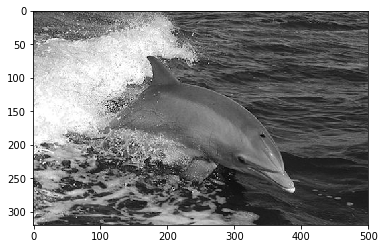

(320, 500)
uint8
208
[ 88  83 126 120  92 231 236 199 227 245 213 178 145 109 158 181 178 220
 207 176 182 174 165 161 159 166 176 181 187 191 176 162 191 186 190 203
 199 172 163 180 200 207 195 185 189 187 198 200 184 202 213 189 176 207
 209 198 187 182 189 197 213 236 220 227 252 238 220 201 204 227 205 220
 230 227 219 202 192 208 228 214 205 212 202 204 202 186 198 211 198 192
 200 209 218 215 200 203 200 213 224 208 211 229 213 217 233 218 199 219
 241 232 222 221 245 239 246 224 211 211 217 227 249 249 234 242 250 232
 234 230 206 200 233 244 233 237 224 222 233 250 247 238 234 228 240 225
 238 247 238 235 230 223 241 230 244 245 245 240 226 237 255 246 228 250
 247 240 237 214 228 197 229 248 222 224 249 250 251 239 244 243 224 203
 220 229 226 199 192 236 255 248 249 247 241 255 245 248 246 248 238 233
 228 228 227 211 203 213 208 189 188 187 192 181 191 177 149 205 205 165
 137 173 174 119  79 103 111  94 145 172 128 130 172 130 145 207 188 149
 114  86 102 125 112 103 118 1

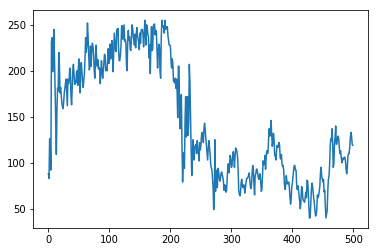

[[81 77 77]
 [81 78 76]
 [82 79 77]]


In [3]:
img = cv2.imread('course_images/dolphin.png',0) # 0 faz abrir em escala de cinza
plt.imshow(img,'gray')
plt.show()

print(img.shape)
print(img.dtype)
print(img[49,99])
print(img[49,:])
plt.plot(img[49,:])
plt.show()
print(img[100:103,200:203]) # range não inclui o último

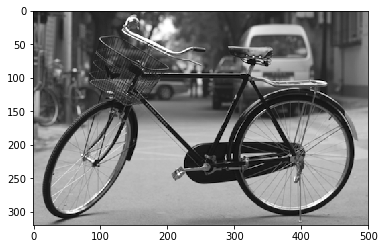

(320, 500)


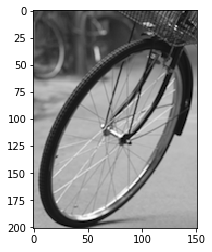

(201, 151)


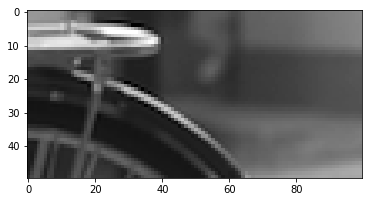

(50, 100)


In [4]:
img = cv2.imread('course_images/bicycle.png',0) # 0 faz abrir em escala de cinza
plt.imshow(img,'gray')
plt.show()
print(img.shape)

cropped = img[109:310, 9:160]
plt.imshow(cropped,'gray')
plt.show()
print(cropped.shape)

# O que acontece com crop fora do range da imagem?
out_of_range = img[100:150, 400:600]
plt.imshow(out_of_range,'gray')
plt.show()
print(out_of_range.shape)

(258, 320, 3)


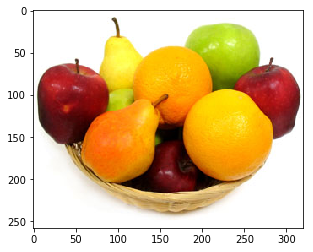

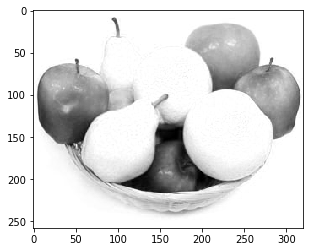

(258, 320)


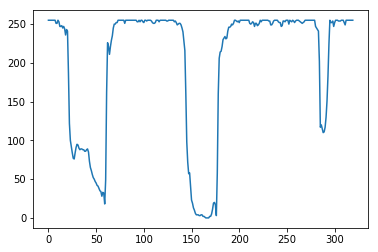

In [5]:
img = cv2.imread('course_images/fruit.png')
print(img.shape)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.show()

img_red = img[:,:,2]
plt.imshow(img_red,'gray')
plt.show()
print(img_red.shape)
plt.plot(img_red[150,:])
plt.show()
# Por que as maçãs não apresentam alta intensidade no canal vermelho?

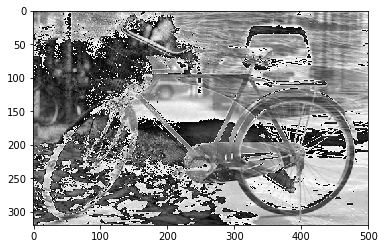

[148 127 140 164 150 155 141 175 232 247 206 150 139 144 154 184 167 144
 151 152]
[104 117 123 121 115 106 102 106 111 111 107  95  95 100 103 100  94  96
 104 115]
[252 244   7  29   9   5 243  25  87 102  57 245 234 244   1  28   5 240
 255  11]


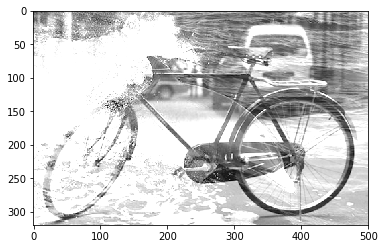

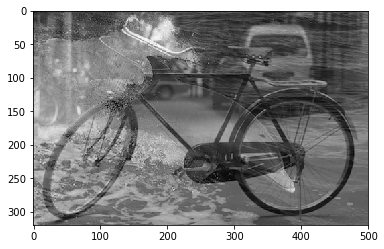

uint8


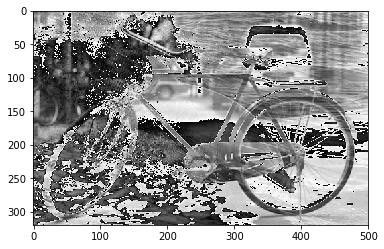

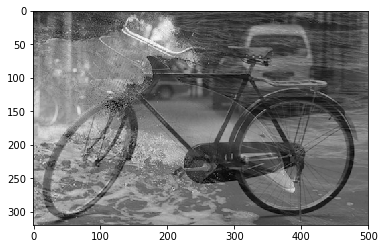

float64


In [6]:
dolphin = cv2.imread('course_images/dolphin.png',0)
bicycle = cv2.imread('course_images/bicycle.png',0)

summed = dolphin + bicycle
plt.imshow(summed,'gray'); plt.show()

# python: overflow de inteiros
print(dolphin[50,:20])
print(bicycle[50,:20])
print(summed[50,:20])

summed = dolphin + bicycle.astype('uint16')
summed = summed.clip(0,255) # coloca em zero valores negativos, e em 255 valores maiores que 255
plt.imshow(summed,'gray'); plt.show()

average = dolphin // 2 + bicycle // 2 # divisão inteira, para manter uint8
plt.imshow(average,'gray')
plt.show()
print(average.dtype)

average_alt = (dolphin + bicycle) // 2
plt.imshow(average_alt,'gray')
plt.show()

# ------- usando float -------
summed = dolphin + bicycle.astype('float64')
plt.imshow(summed,'gray') # menor valor -> preto, maior valor -> branco (não necessariamente 0-255)
plt.show()
print(summed.dtype)

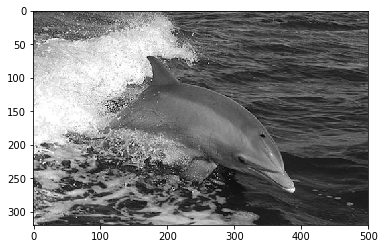

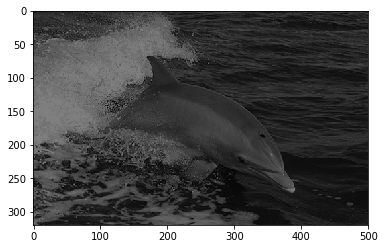

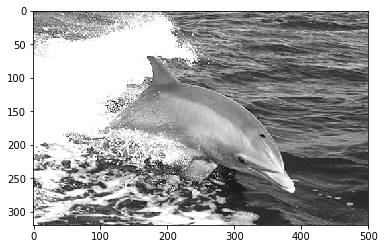

In [7]:
plt.imshow(dolphin // 2,'gray') # não modificou a impressão da imagem (vmax reduzido)
plt.show()

plt.imshow(dolphin // 2,'gray', vmin=0, vmax=255)
plt.show()

plt.imshow(dolphin * 1.5,'gray', vmin=0, vmax=255) # dispensou o dolphin.clip(0,255)
plt.show()

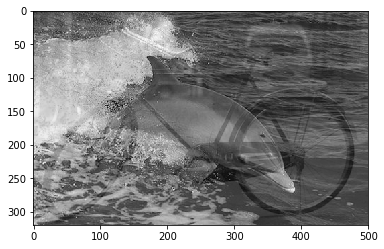

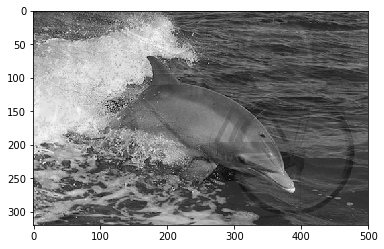

In [8]:
# Blending: combinação linear convexa de imagens

result = 0.75 * dolphin + 0.25 * bicycle
plt.imshow(result,'gray', vmin=0, vmax=255)
plt.show()

result = 0.85 * dolphin + 0.15 * bicycle
plt.imshow(result,'gray', vmin=0, vmax=255)
plt.show()

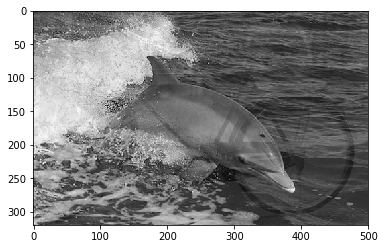

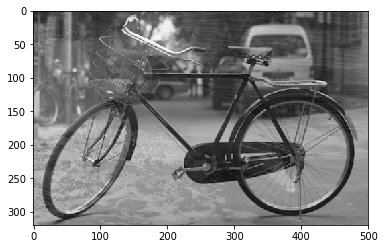

In [9]:
def blend(a, b, alpha):
    return alpha * a + (1-alpha) * b

plt.imshow(blend(dolphin,bicycle,0.85), 'gray', vmin=0, vmax=255)
plt.show()

plt.imshow(blend(dolphin,bicycle,0.25), 'gray', vmin=0, vmax=255)
plt.show()

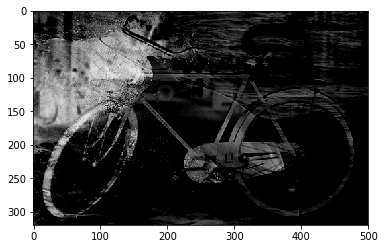

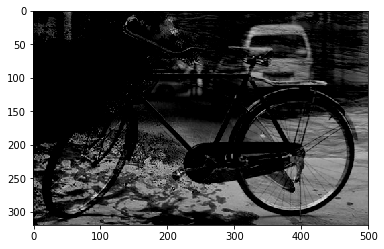

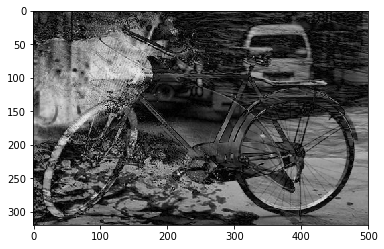

In [10]:
# Subtração de imagens

diff = dolphin - bicycle.astype('float64')
plt.imshow(diff, 'gray', vmin=0, vmax=255); plt.show()

diff = bicycle.astype('float64') - dolphin
plt.imshow(diff, 'gray', vmin=0, vmax=255); plt.show()

abs_diff = abs(dolphin - bicycle.astype('float64')) # float64: não será truncado antes do abs()
plt.imshow(abs_diff, 'gray', vmin=0, vmax=255); plt.show()

0.14217957603925335
0.4492870222388096
[-1.6925202   0.37092515 -0.71749868  1.20003319 -1.93915526]


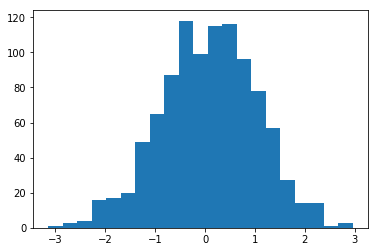

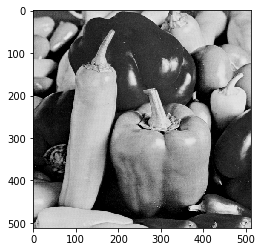

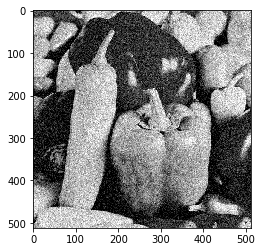

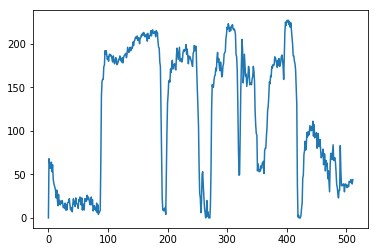

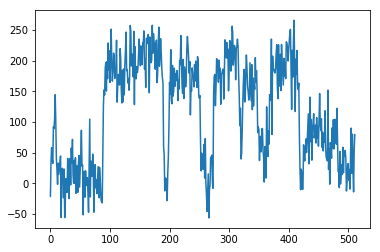

In [11]:
# 2A-L1 21

from numpy.random import randn

print(randn())
print(randn())
print(randn(5))
plt.hist(randn(1000),21); plt.show()

plt.imshow(imgreen, 'gray', vmin=0, vmax=255); plt.show()

sigma = 30
noise = imgreen + randn(*imgreen.shape) * sigma # operador * expande lista em parâmetros
plt.imshow(noise, 'gray', vmin=0, vmax=255); plt.show()

plt.plot(imgreen[255,:]); plt.show()
plt.plot(noise[255,:]); plt.show()

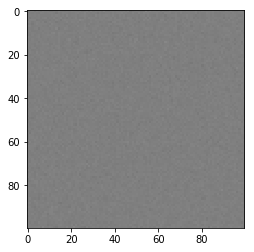

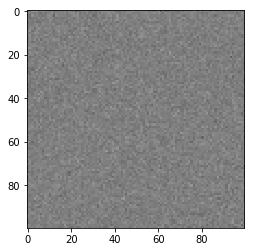

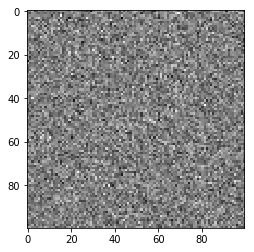

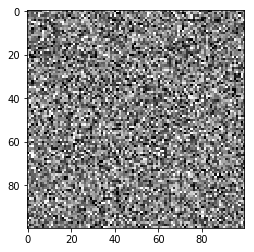

In [12]:
plt.imshow(127 + randn(100,100)*2,  'gray', vmin=0, vmax=255); plt.show()
plt.imshow(127 + randn(100,100)*8,  'gray', vmin=0, vmax=255); plt.show()
plt.imshow(127 + randn(100,100)*32, 'gray', vmin=0, vmax=255); plt.show()
plt.imshow(127 + randn(100,100)*64, 'gray', vmin=0, vmax=255); plt.show()

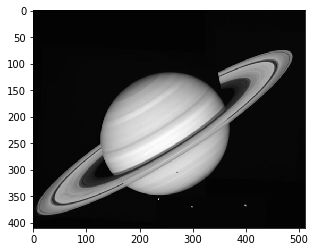

float64


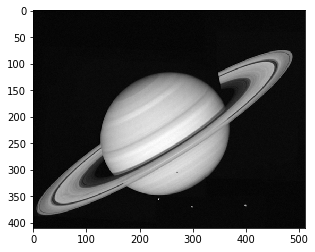

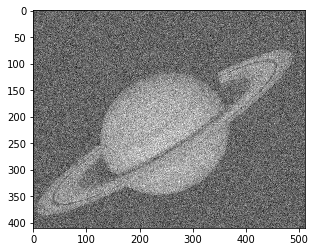

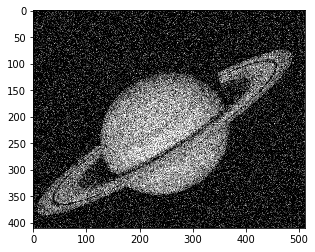

In [13]:
img = cv2.imread('course_images/saturn.png',0)
plt.imshow(img, 'gray'), plt.show()

img_noise = img + randn(*img.shape) # operador * expande lista em parâmetros
print(img_noise.dtype)
plt.imshow(img_noise, 'gray'); plt.show()

img_noise = img + randn(*img.shape)*50
plt.imshow(img_noise, 'gray'); plt.show()
plt.imshow(img_noise, 'gray', vmin=0, vmax=255); plt.show()

# Note que as luas de saturno se perdem no ruído.

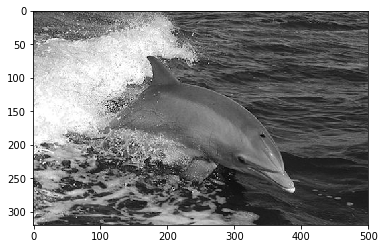

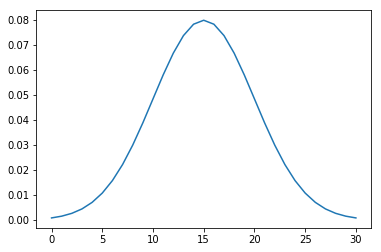

NameError: name 'np' is not defined

In [14]:
# 2A-L2 43

hsize = 31
sigma = 5

plt.imshow(dolphin, 'gray'); plt.show()

h1D = cv2.getGaussianKernel(hsize, sigma) # 1D
plt.plot(h1D); plt.show()
h = np.outer(h1D,h1D) # 2D
plt.imshow(h, 'gray'); plt.show()

outim = cv2.filter2D(dolphin, -1, h) # correlação (não convolução). -1 no 2o param repete dtype da imagem.
plt.imshow(outim, 'gray'); plt.show()

outim = cv2.GaussianBlur(dolphin, (hsize,hsize), sigma) # mesmo efeito
plt.imshow(outim, 'gray'); plt.show()

In [ ]:
# 2A-L2 43

hsize = 31
for sigma in [1,4,10]:
    h1D = cv2.getGaussianKernel(hsize, sigma) # 1D
    h = np.outer(h1D,h1D) # 2D
    plt.imshow(h, 'gray'); plt.show()

    outim = cv2.filter2D(dolphin, -1, h)
    plt.imshow(outim, 'gray'); plt.show()